# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid") # Plot style

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv("data/raw/data.csv", index_col = 0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['y']), data['y'], test_size=0.25, random_state=10)

X_train.shape

(150, 99)

## Types of Linear Regression
### 0. Regression without Regularization
$$ \hat{w} = argmin_w((\boldsymbol{y} - \boldsymbol{Xw})^T(\boldsymbol{y} - \boldsymbol{Xw})) $$
If the derivative is equalized to $0$, then:
$$\hat{w} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{y})$$

#### 0.1 Custom implemented Linear Regression

In [4]:
from src.linear_regression import MyLinearRegression

model = MyLinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
my_mse = mean_squared_error(predictions, y_test)
print(f"Test MSE: {my_mse}")

Test MSE: 0.9546859161028424


#### 0.2 Sklearn's Linear Regression

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
sklearn_mse = mean_squared_error(pred, y_test)
print(f"Train MSE: {mean_squared_error(model.predict(X_train), y_train)}")
print(f"Test MSE: {sklearn_mse}")

assert np.round(my_mse, 2) == np.round(sklearn_mse, 2)

Train MSE: 0.11916964321869097
Test MSE: 0.9546859161028277


### 1. Regression with Lasso Regularization (L1)
$$ \hat{w} = argmin_w((\boldsymbol{y} - \boldsymbol{Xw})^T(\boldsymbol{y} - \boldsymbol{Xw}) + \lambda\sum_{i=1}^{N}|w_i|) $$
In case of Lasso Regularization, there is no analytical solution, so the Gradient Descent must be performed.

#### 1.1 Custom implemented Linear Regression

In [6]:
model = MyLinearRegression(regularization="l1", lam=1, learning_rate=0.001, tol=0.005)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Train MSE:", mean_squared_error(model.predict(X_train), y_train))
print("Test MSE:", mean_squared_error(predictions, y_test))

Converged in 287 steps
Train MSE: 0.1293369496915888
Test MSE: 0.716305219437922


In [7]:
np.round(model.weights, 2)

array([ 0.04,  9.9 ,  8.97,  7.96,  6.64,  5.81,  4.76,  3.92,  2.84,
        1.93,  0.81,  0.  , -0.03, -0.11, -0.05,  0.04,  0.02, -0.05,
       -0.02,  0.  ,  0.22, -0.07,  0.12,  0.05, -0.07, -0.13,  0.18,
        0.14,  0.07,  0.07,  0.11,  0.22,  0.14,  0.12,  0.23,  0.07,
       -0.18,  0.  , -0.  ,  0.  ,  0.08,  0.21,  0.01,  0.  ,  0.08,
        0.02, -0.19,  0.1 , -0.09, -0.1 , -0.2 ,  0.13,  0.14, -0.08,
        0.38, -0.01,  0.24,  0.01,  0.2 ,  0.12,  0.  ,  0.07, -0.08,
       -0.04,  0.01,  0.1 , -0.05, -0.05, -0.07, -0.  ,  0.03,  0.02,
        0.39,  0.11, -0.  , -0.07,  0.21,  0.01,  0.36,  0.1 , -0.05,
       -0.34,  0.11,  0.15, -0.07,  0.04,  0.  , -0.  , -0.08, -0.21,
       -0.08, -0.02, -0.01,  0.12,  0.19, -0.1 , -0.  ,  0.07,  0.12,
       -0.16])

Text(0, 0.5, 'Loss')

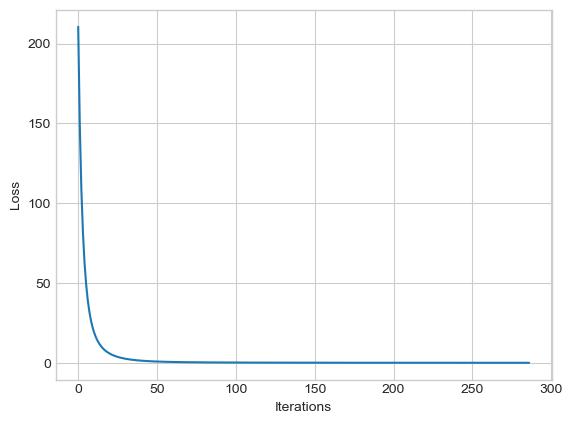

In [8]:
plt.plot(model.loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")

#### 1.2 Sklearn's Linear Regression

In [9]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Train MSE:", mean_squared_error(model.predict(X_train), y_train))
print("Test MSE:", mean_squared_error(pred, y_test))

Train MSE: 24.820216805795248
Test MSE: 20.863256031485406


### 2. Regression with Ridge Regularization (L2) 
$$ \hat{w} = argmin_w((\boldsymbol{y} - \boldsymbol{Xw})^T(\boldsymbol{y} - \boldsymbol{Xw}) + \lambda||\boldsymbol{w}||^2) $$
Again, it can be shown that:
$$\hat{w} = (\boldsymbol{X}^T\boldsymbol{X} + \lambda\boldsymbol{I})^{-1}(\boldsymbol{X}^T\boldsymbol{y})$$

#### 2.1 Custom implemented Linear Regression

In [10]:
model = MyLinearRegression(regularization="l2", lam=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Train MSE:", mean_squared_error(model.predict(X_train), y_train))
print("Test MSE:", mean_squared_error(predictions, y_test))

ValueError: operands could not be broadcast together with shapes (100,100) (150,150) 

#### 2.2 Sklearn's Linear Regression

In [11]:
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Train MSE:", mean_squared_error(model.predict(X_train), y_train))
print("Test MSE:", mean_squared_error(pred, y_test))

Train MSE: 0.2100745511663781
Test MSE: 1.221136205805648


## Regularization parameter effect on the coefficients

The regularization parameter influences the values of the coefficients. Let's create 2 plots (one for Lasso and one for Ridge) that have the regularization parameter on the x-axis and coefficient values on the y-axis. Since we have 99 coefficients, let's take only the first 20.

In [12]:
lasso = Lasso()
lasso.fit(X_train,y_train)
coefficients_lasso = []
mse_lasso_train = []
mse_lasso_test = []

In [13]:
ridge = Ridge()
ridge.fit(X_train, y_train)
coefficients_ridge = []
mse_ridge_train = []
mse_ridge_test = []

In [14]:
alphas = np.linspace(0.1, 10, 100)
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    mse_lasso_train.append(mean_squared_error(lasso.predict(X_train), y_train))
    mse_lasso_test.append(mean_squared_error(lasso.predict(X_test), y_test))
    coefficients_lasso.append(lasso.coef_)
    
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    mse_ridge_train.append(mean_squared_error(ridge.predict(X_train), y_train))
    mse_ridge_test.append(mean_squared_error(ridge.predict(X_test), y_test))
    coefficients_ridge.append(ridge.coef_)

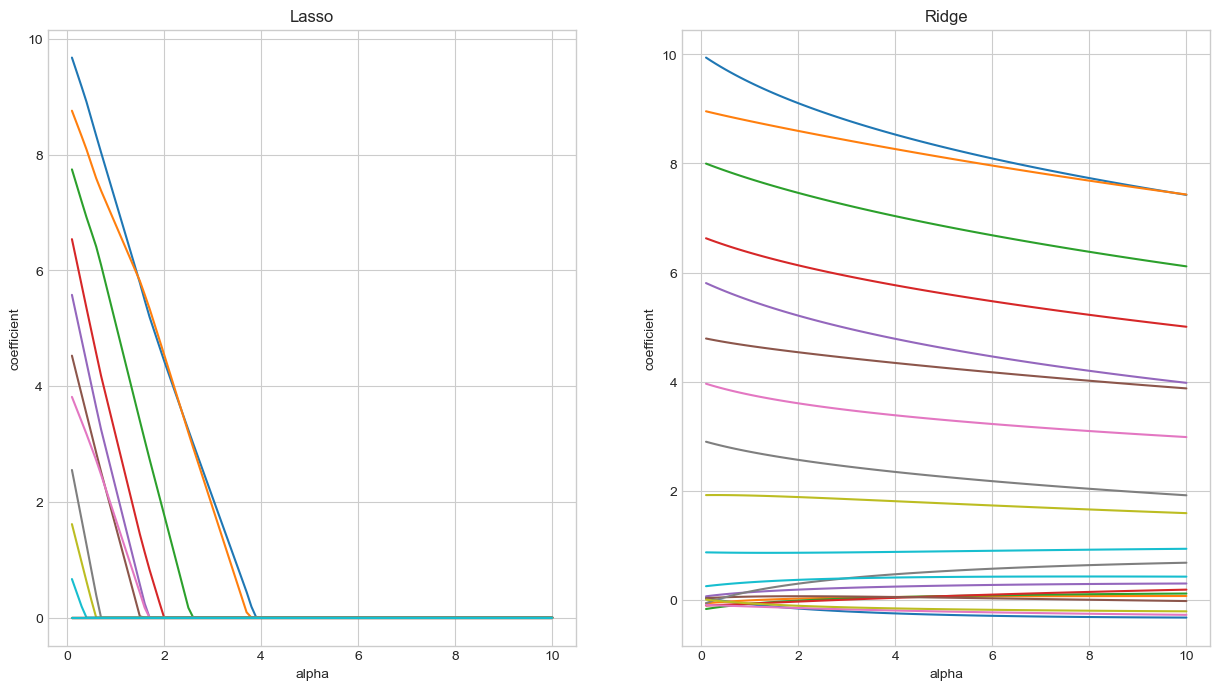

In [15]:
coefficients_lasso = np.array(coefficients_lasso)
coefficients_ridge = np.array(coefficients_ridge)

plt.rcParams["figure.figsize"] = (15.0, 8.0)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.set(title="Lasso", xlabel="alpha", ylabel="coefficient")
ax2.set(title="Ridge", xlabel="alpha", ylabel="coefficient")

for i in range(20):
    ax1.plot(alphas, coefficients_lasso[:, i])
    ax2.plot(alphas, coefficients_ridge[:, i])

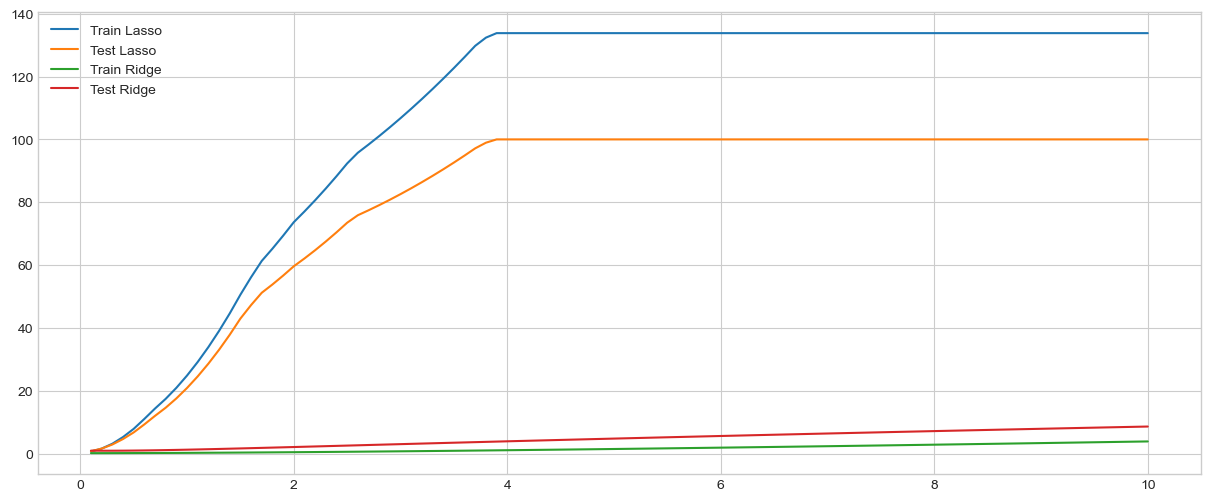

In [16]:
# coefficients_lasso = np.array(coefficients_lasso)
# coefficients_ridge = np.array(coefficients_ridge)

plt.rcParams["figure.figsize"] = (15.0, 6.0)

plt.plot(alphas, mse_lasso_train, label="Train Lasso")
plt.plot(alphas, mse_lasso_test, label="Test Lasso")

plt.plot(alphas, mse_ridge_train, label="Train Ridge")
plt.plot(alphas, mse_ridge_test, label="Test Ridge")

plt.legend()

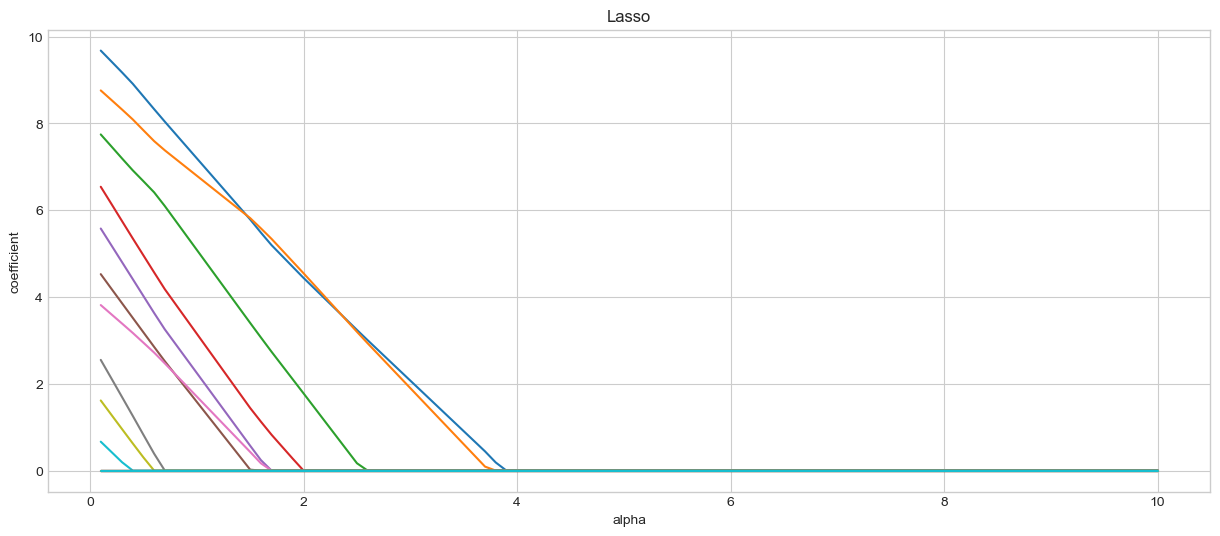

In [17]:
plt.title("Lasso")
plt.xlabel("alpha")
plt.ylabel("coefficient")
for i in range(20):
    plt.plot(alphas, coefficients_lasso[:, i])